In [1]:
#import packages for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

### DATA COLLECTION

In [18]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [2]:
#import dataset using Github link
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.columns=["Id","RI_refractive_index","Na_Sodium","Mg_Magnesium","Al_Aluminum","Si_Silicon","K_Potassium","Ca_Calcium","Ba_Barium","Fe_Iron","Glass_Type"]
df

,Id,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
# converting Glass type column values into two categories i.e, window and non-window
df["Glass_Type"]=np.where(df["Glass_Type"]>=5,"non-window","window")
df

,Id,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,window
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,window
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,window
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,window
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,window
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,non-window
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,non-window
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,non-window
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,non-window


In [5]:
#view top few rows
df.head(11)

,Id,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,window
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,window
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,window
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,window
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,window
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,window
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,window
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,window
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,window
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,window


In [6]:
#check number of rows and columns present in dataset
df.shape

(214, 11)

In [7]:
#check information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   214 non-null    int64  
 1   RI_refractive_index  214 non-null    float64
 2   Na_Sodium            214 non-null    float64
 3   Mg_Magnesium         214 non-null    float64
 4   Al_Aluminum          214 non-null    float64
 5   Si_Silicon           214 non-null    float64
 6   K_Potassium          214 non-null    float64
 7   Ca_Calcium           214 non-null    float64
 8   Ba_Barium            214 non-null    float64
 9   Fe_Iron              214 non-null    float64
 10  Glass_Type           214 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB


There are no null values in this dataset

In [8]:
# describe each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
RI_refractive_index,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na_Sodium,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg_Magnesium,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al_Aluminum,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si_Silicon,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K_Potassium,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca_Calcium,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba_Barium,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe_Iron,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


### Exploratory Data Analysis

In [9]:
#check value count for each column so that we get unique values with their number of occurances
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI_refractive_index, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na_Sodium, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg_Magnesium, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al_Aluminum, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si_Silicon, Length: 133, dtype: int64


0.00   

In [10]:
# Id is different for every row so it does'nt have any relevance for our analysis
df.drop(columns=["Id"],inplace=True)

#### Univariate Analysis

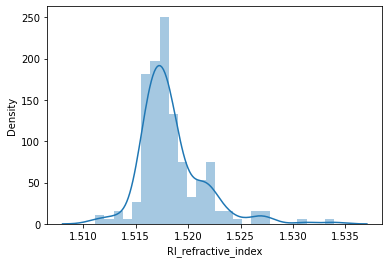

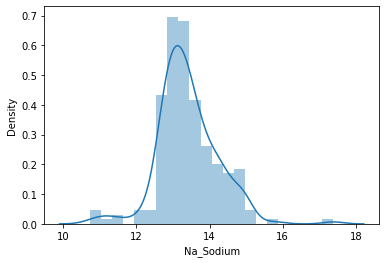

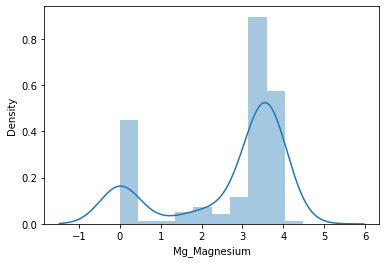

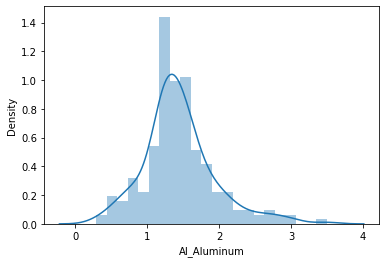

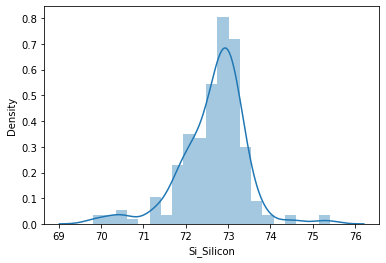

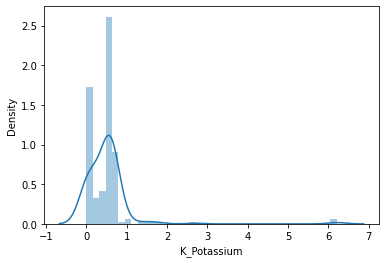

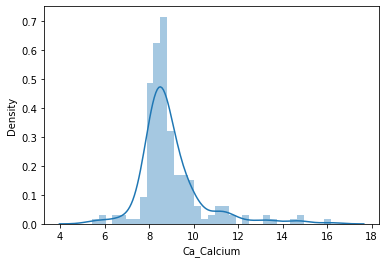

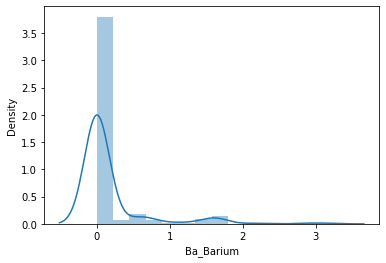

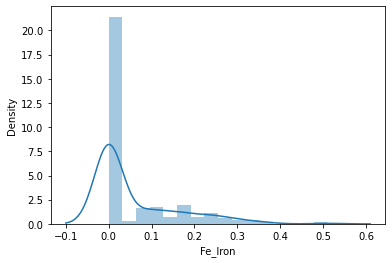

In [11]:
#Display distribution of all numrical_cols 
for i in df.columns[:-1]:
    sns.distplot(df[i])
    plt.show()

Except Mg_Magnesium, other looks like closer to normal distribution with some skewness.

#### Bivariate Analysis

In [12]:
"""
# for all numerical columns check how the Glass_Type vary
for i in df.columns:
    if i != 'Glass_Type':
        sns.boxplot(y=df['Glass_Type'],x=df[i])
        plt.show()
"""

"\n# for all numerical columns check how the Glass_Type vary\nfor i in df.columns:\n    if i != 'Glass_Type':\n        sns.boxplot(y=df['Glass_Type'],x=df[i])\n        plt.show()\n"

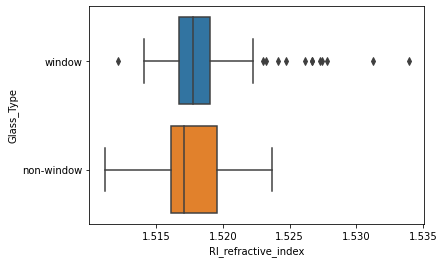

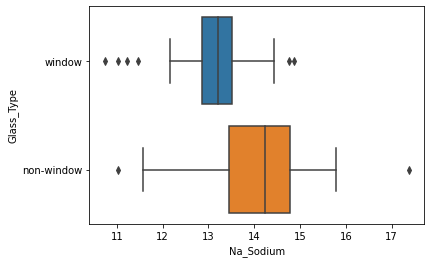

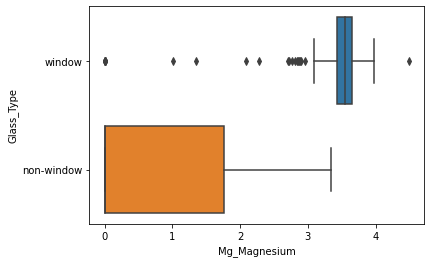

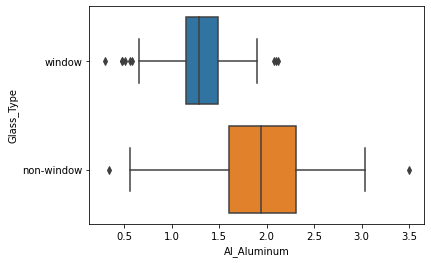

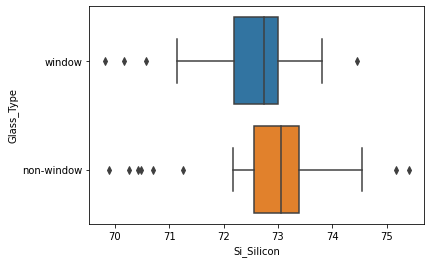

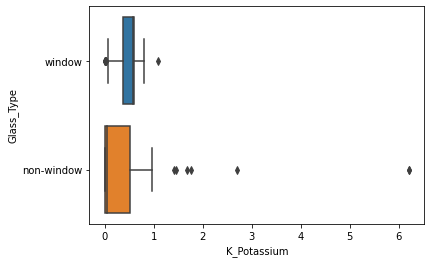

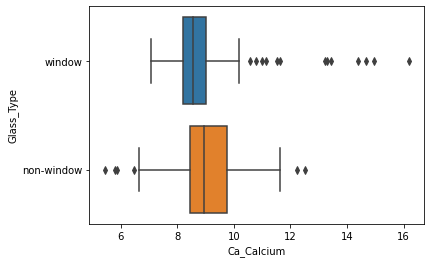

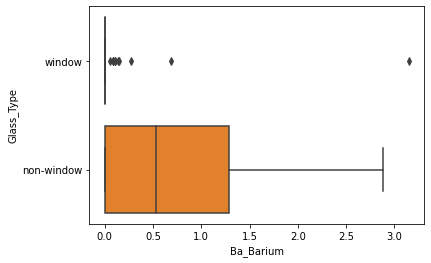

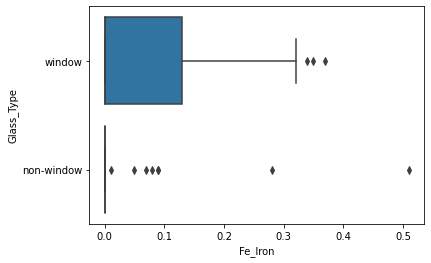

In [13]:
# for all numerical columns check how the Glass_Type vary
for i in df.columns[:-1]:
    sns.boxplot(y=df['Glass_Type'],x=df[i])
    plt.show()

Based on the above chart, Magnesium,Aluminum,Barium,Iron looks good indicator which seprates window and non-window glasses.

#### Multivariate Analysis

<AxesSubplot:>

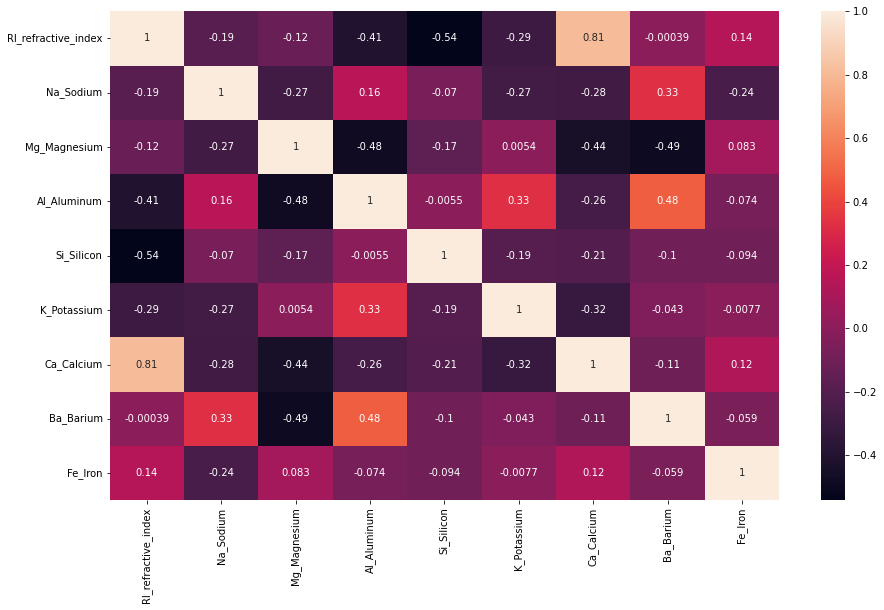

In [14]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

Calcium and Refractive Index has a high correlation.

### Feature Engineering

In [18]:
X=df[df.columns[0:-1]]
X

,RI_refractive_index,Na_Sodium,Mg_Magnesium,Al_Aluminum,Si_Silicon,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [19]:
y=df['Glass_Type']
y

0          window
1          window
2          window
3          window
4          window
          ...    
209    non-window
210    non-window
211    non-window
212    non-window
213    non-window
Name: Glass_Type, Length: 214, dtype: object

In [20]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,725048.576068,RI_refractive_index
4,366484.182843,Si_Silicon
1,13890.374403,Na_Sodium
6,8031.654306,Ca_Calcium
2,795.895474,Mg_Magnesium
3,175.092652,Al_Aluminum
5,56.832884,K_Potassium
7,27.374304,Ba_Barium
8,1.597314,Fe_Iron


In [23]:
X.drop(columns=['RI_refractive_index'],inplace=True)

In [24]:
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
3,802.282010,Si_Silicon
0,378.971159,Na_Sodium
5,95.100272,Ca_Calcium
2,19.898385,Al_Aluminum
1,13.009976,Mg_Magnesium
4,2.244631,K_Potassium
6,1.907852,Ba_Barium
7,1.445110,Fe_Iron


In [25]:
X.drop(columns=['Si_Silicon'],inplace=True)

In [26]:
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,88.988527,Na_Sodium
4,41.505876,Ca_Calcium
2,16.724230,Al_Aluminum
1,7.725382,Mg_Magnesium
3,1.981112,K_Potassium
5,1.905360,Ba_Barium
6,1.441511,Fe_Iron


In [27]:
X.drop(columns=['Na_Sodium'],inplace=True)

In [28]:
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,11.355617,Al_Aluminum
3,10.445310,Ca_Calcium
0,4.005987,Mg_Magnesium
2,1.974369,K_Potassium
4,1.744592,Ba_Barium
5,1.382554,Fe_Iron


In [29]:
X.drop(columns=['Al_Aluminum'],inplace=True)

In [30]:
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
2,4.623637,Ca_Calcium
0,3.984613,Mg_Magnesium
1,1.494664,K_Potassium
4,1.378109,Fe_Iron
3,1.277747,Ba_Barium


We have removed all the columns which had multicollinearity.

In [31]:
#Feature scaling of X
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X

,Mg_Magnesium,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron
0,1.254639,-0.671705,-0.145766,-0.352877,-0.586451
1,0.636168,-0.026213,-0.793734,-0.352877,-0.586451
2,0.601422,-0.164533,-0.828949,-0.352877,-0.586451
3,0.698710,0.112107,-0.519052,-0.352877,-0.586451
4,0.650066,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...
209,-1.865511,-0.640968,0.157088,1.783978,-0.586451
210,-1.865511,-0.763919,-0.392276,2.852405,-0.586451
211,-1.865511,-0.763919,-0.364103,2.953200,-0.586451
212,-1.865511,-0.763919,-0.335931,2.812087,-0.586451


In [32]:
y.value_counts()

window        163
non-window     51
Name: Glass_Type, dtype: int64

In [33]:
# Oversampling the data as Glass type values are not balanced
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [34]:
y.value_counts()

window        163
non-window    163
Name: Glass_Type, dtype: int64

### Model Building

In [35]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [36]:
X_train

,Mg_Magnesium,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron
158,0.504135,0.127475,-0.117594,-0.352877,-0.586451
145,0.684812,0.188951,-0.195068,-0.352877,3.013973
215,-1.865511,2.488303,0.355237,-0.352877,-0.586451
103,0.323458,-0.640968,1.889697,-0.352877,-0.586451
255,-1.002267,0.544621,0.691303,-0.352877,-0.586451
...,...,...,...,...,...
306,-1.865511,-0.763919,-0.343935,2.826050,-0.586451
10,0.538881,0.265795,-0.610613,-0.352877,1.882411
211,-1.865511,-0.763919,-0.364103,2.953200,-0.586451
188,-0.336707,0.404115,0.565589,-0.352877,-0.586451


In [37]:
X_test

,Mg_Magnesium,K_Potassium,Ca_Calcium,Ba_Barium,Fe_Iron
30,0.608372,0.173582,-0.188025,-0.352877,0.853719
110,-1.865511,-0.763919,4.030806,-0.352877,-0.586451
174,-0.746704,0.404115,0.523330,0.130939,4.659881
123,0.552779,0.188951,-0.681044,-0.352877,-0.586451
209,-1.865511,-0.640968,0.157088,1.783978,-0.586451
...,...,...,...,...,...
278,-1.865511,-0.763919,-0.395190,2.930816,-0.586451
35,0.531931,0.096738,-0.272543,-0.352877,-0.586451
187,0.455491,0.158213,-0.089421,-0.352877,-0.586451
81,0.531931,0.173582,-0.772604,-0.352877,-0.586451


In [38]:
y_train

158        window
145        window
215    non-window
103        window
255    non-window
          ...    
306    non-window
10         window
211    non-window
188    non-window
175    non-window
Name: Glass_Type, Length: 244, dtype: object

In [39]:
y_test

30         window
110        window
174    non-window
123        window
209    non-window
          ...    
278    non-window
35         window
187    non-window
81         window
73         window
Name: Glass_Type, Length: 82, dtype: object

#### Logistic Regression

In [40]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [41]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array(['window', 'non-window', 'window', 'window', 'non-window', 'window',
       'non-window', 'non-window', 'window', 'non-window', 'non-window',
       'window', 'non-window', 'non-window', 'window', 'window', 'window',
       'window', 'non-window', 'non-window', 'window', 'window', 'window',
       'window', 'window', 'window', 'non-window', 'window', 'window',
       'non-window', 'non-window', 'window', 'non-window', 'window',
       'window', 'window', 'window', 'non-window', 'window', 'window',
       'non-window', 'window', 'window', 'window', 'window', 'window',
       'non-window', 'window', 'non-window', 'non-window', 'non-window',
       'non-window', 'non-window', 'non-window', 'window', 'window',
       'window', 'window', 'non-window', 'window', 'non-window',
       'non-window', 'window', 'non-window', 'non-window', 'non-window',
       'window', 'non-window', 'window', 'window', 'window', 'window',
       'non-window', 'non-window', 'window', 'window', 'non-window',


In [42]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[31,  8],
       [ 3, 40]], dtype=int64)

In [43]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8658536585365854

#### Random Forest

In [44]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['window', 'window', 'window', 'window', 'non-window', 'window',
       'non-window', 'non-window', 'window', 'non-window', 'non-window',
       'non-window', 'non-window', 'non-window', 'window', 'window',
       'window', 'window', 'non-window', 'non-window', 'window', 'window',
       'window', 'window', 'window', 'non-window', 'non-window', 'window',
       'window', 'non-window', 'non-window', 'window', 'window', 'window',
       'window', 'window', 'non-window', 'non-window', 'window', 'window',
       'non-window', 'window', 'window', 'window', 'window', 'window',
       'non-window', 'window', 'non-window', 'non-window', 'non-window',
       'non-window', 'non-window', 'non-window', 'window', 'window',
       'window', 'window', 'non-window', 'window', 'non-window',
       'non-window', 'window', 'non-window', 'non-window', 'non-window',
       'window', 'non-window', 'non-window', 'window', 'window',
       'non-window', 'non-window', 'non-window', 'window', 'window',
  

In [46]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[36,  3],
       [ 1, 42]], dtype=int64)

In [47]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.9512195121951219

The accuracy of Random Forest model is 95%.
The Random Forest model is better than Logistic Regression model.